# Used Car Price Prediction

## 1. Introduction

The Used Car Market is a very important business nowadays. According to the American Economy Association (AEA), the used car market is approximately three times as large as the number of new-car market. This business has a very important role in broadening the spectrum of goods available to consumers.

As this type of market is very relevant to the society, the understading on how they work is essencial. The objetive of this project is to study all the variables that can influence the price of an used car and also try to predict the price of an used car given some variables. All this analysis are going to be done with a dataset obtained from Kaggle website.

The dataset has the following variables with its respectively meaning:
- Unnamed: It is just a index and it can be removed from the dataset
- Name: The model and the manufacturer of the car
- Location: The city where this car is being sold.
- Year: Year of fabrication of the car
- Kilometers_Drive: Quantity of Kms driven by the car.
- Fuel_Type: The type of fuel used in the car.
- Transmission: The type of transmission used in the car.
- Owner_Type: The quantity of the owners that this had.
- Mileage: Quantity of km the car can drive with 1L of fuel.
- Engine: The capacity of the engine, it's a measure of volume
- Power: The potency of the motor of the car.
- Seats: Number of seats in the car
- New_Price: In this column there are many missing values, so they can be removed from the dataset.
- Price: The price announced for the car.

## 2. Importing libraries

After the definition  and the having in mind the purpose of this project , the first thing to do is the import all the libraries that will help to achieve our goals.

In [1]:
# Standard data analysis and wrangling libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Various ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import r2_score

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import cross_val_score

from category_encoders import TargetEncoder

import warnings
warnings.filterwarnings('ignore')

## 3. Data importing

In the section it will be imported the dataset received from the company and it will be observed the content inside it.

In [2]:
#Import of the dataset
data = pd.read_csv('data.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
#Dropping the collum of index
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
#Getting some basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
#Getting the size of the data
data.shape

(6019, 13)

The column "Name" it will be splitted on brand of the car and the model. So this can help the understanding of the dataset.

In [6]:
brand = []
model = []
results = []
for i in range(len(data)):
    word = []
    for j in range(len(data['Name'][i])):
        if data['Name'][i][j] == " ":
            brand.append(data['Name'][i][:j])
            model.append(data['Name'][i][-len(data['Name'][i])+j+1:])
            results.append([data['Name'][i][:j],data['Name'][i][-len(data['Name'][i])+j+1:]])
            break


In [7]:
data_new = pd.DataFrame(results)
data_new.columns = ['Brand','Model']
data_new

,Brand,Model
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic
...,...,...
6014,Maruti,Swift VDI
6015,Hyundai,Xcent 1.1 CRDi S
6016,Mahindra,Xylo D4 BSIV
6017,Maruti,Wagon R VXI


In [8]:
data = pd.concat([data_new,data], axis = 1)
data = data.drop("Name", axis = 1)
data

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai,Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra,Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti,Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## 4. Data Cleaning

It will be done the cleaning of the data, all the missing value problem will be solved and it will be analyzed all the data distribution

In [9]:
data.isnull().sum()

Brand                   0
Model                   0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

As it has missing values on the data, some action need to be taken

New Price collum has a 86% of missing values, so the best action is to remove this collumn from our dataset.

In [10]:
#Dropping the collum of New Price
data = data.drop('New_Price', axis =1)

The others missing values presented above have a very small occurence in all the data. So the best action to make is to remove the line that they are located.

In [11]:
#Dropping the missing values lines
data = data.dropna()
data = data.reset_index(drop=True)

In [12]:
data

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai,Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra,Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti,Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [13]:
#Checking again if the missing values were removed
data.isnull().sum()

Brand                0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

As expected, all the missing values weer removed

In [14]:
#Analysing the data on each column
for a in data.columns:
    print(data[a].value_counts().sort_values(ascending=False))
    print()

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Lamborghini         1
Ambassador          1
Isuzu               1
Bentley             1
Name: Brand, dtype: int64

XUV500 W8 2WD                            49
Swift VDI                                45
Swift Dzire VDI                          34
City 1.5 S MT                            34
Swift VDI BSIV                           31
                                         ..
Rover Range Rover Sport 200

As shown above, there is a car with a number of seats equal to Zero. This is an impossible information and it needs to be corrected.

In [15]:
#Looking for the trouble data
data[data['Seats'] == 0]

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3969,Audi,A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0


From the information gotten from Google, this model of car has 5 seats.

From the information above, we can see that on Power column that is null value. So they need to be treated

In [16]:
#Correcting the number of seats
data['Seats'] = data['Seats'].replace([0],5)

In [17]:
#Lookinf for the trouble table on engine column
data[data['Power'] == 'null bhp']

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford,Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,Hyundai,Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,Hyundai,Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,Hyundai,Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,Hyundai,Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,Hyundai,Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,1.85
5830,Hyundai,Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5881,Skoda,Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5899,Mahindra,Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


In [18]:
#Converting the index to a list
position = data[data['Power'] == 'null bhp'].index.to_list()

In [19]:
#Removing them from the data set
data = data.drop(data.index[position])
data = data.reset_index(drop=True)

In [20]:
#Checking if the data was removed
data[data['Power'] == 'null bhp']

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


The variables Mileage, Engine and Power has its respectively units inside it and they have to be removed.

In [21]:
#Getting the numerical information
mileage = []
for i in range(len(data)):
    for j in range(len(data['Mileage'][i])):
        if data['Mileage'][i][j] == " ":
            mileage.append(float(data['Mileage'][i][:j]))
            break

In [22]:
#Getting the numerical information
engine = []
for i in range(len(data)):
    for j in range(len(data['Engine'][i])):
        if data['Engine'][i][j] == " ":
            engine.append(float(data['Engine'][i][:j]))
            break

In [23]:
#Getting the numerical information
power = []
for i in range(len(data)):
    for j in range(len(data['Power'][i])):
        if data['Power'][i][j] == " ":
            power.append(float(data['Power'][i][:j]))
            break

In [24]:
#Changing the axis name
data = data.rename(columns={'Power':'Power (bhp)', 'Mileage':'Mileage (kmpl)', 'Engine':'Engine (CC)'})

In [25]:
#Changing the values of the axis
data['Power (bhp)'] = power
data['Mileage (kmpl)'] = mileage
data['Engine (CC)'] = engine

In [26]:
data

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti,Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5868,Hyundai,Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5869,Mahindra,Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5870,Maruti,Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


### 4.1 Outliers

In [27]:
# Getting the numerical columns
numerical_attributes = list(data.select_dtypes(include=['float64', 'int64']).columns)
numerical_attributes

['Year',
 'Kilometers_Driven',
 'Mileage (kmpl)',
 'Engine (CC)',
 'Power (bhp)',
 'Seats',
 'Price']

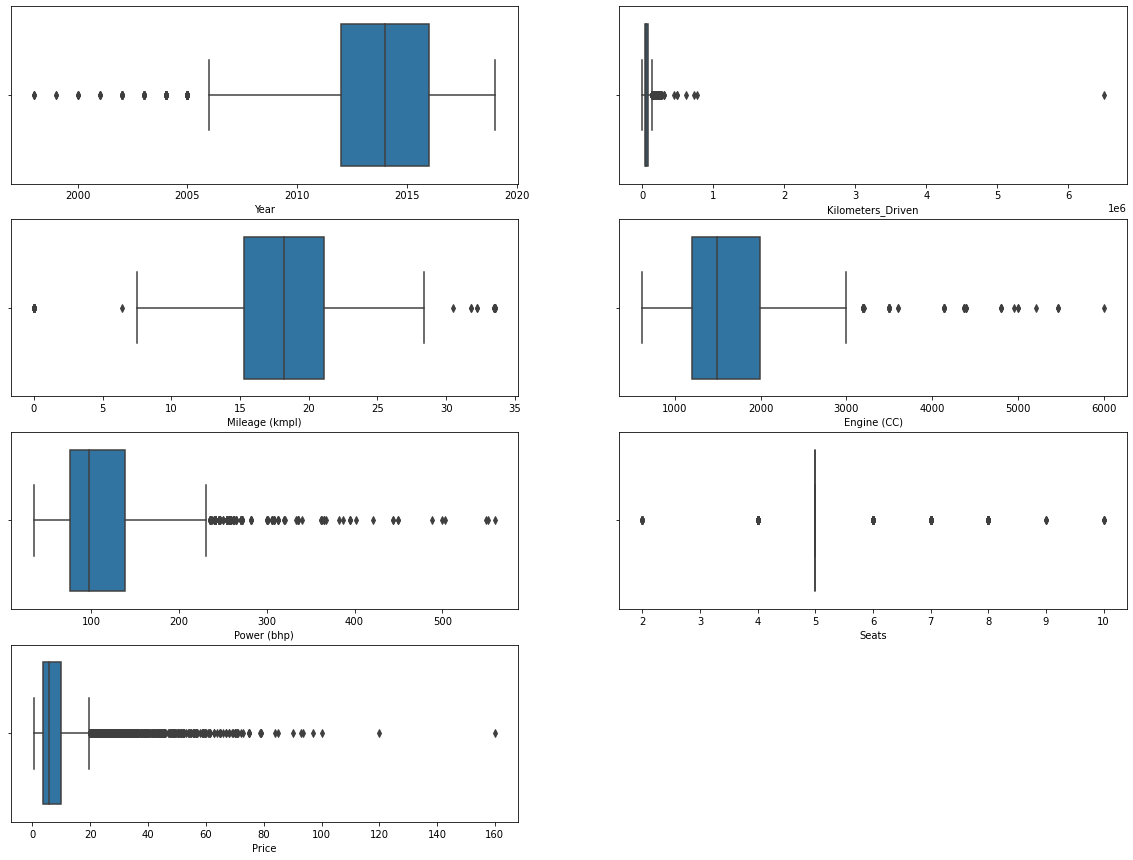

In [28]:
#Plotting the boxplot to check outliers
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.boxplot(data[numerical_attributes[0]])
plt.subplot(4,2,2)
sns.boxplot(data[numerical_attributes[1]])
plt.subplot(4,2,3)
sns.boxplot(data[numerical_attributes[2]])
plt.subplot(4,2,4)
sns.boxplot(data[numerical_attributes[3]])
plt.subplot(4,2,5)
sns.boxplot(data[numerical_attributes[4]])
plt.subplot(4,2,6)
sns.boxplot(data[numerical_attributes[5]])
plt.subplot(4,2,7)
sns.boxplot(data[numerical_attributes[6]])

The dataset has a significant number of outliers. The best action to take is to keep them in out data because the exclusion of them it will cause the loss of performance of the data.

## 5. EDA (Exploratory Data Analysis)

In this section, it will be analized the relationship between the features and they impact the price of the cars

In [29]:
#Descritive statistics information
data.describe()

,Year,Kilometers_Driven,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [30]:
#Getting the categorical attributes
categorical_attributes = data.select_dtypes(include=['object']).columns
categorical_attributes


Index(['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission',
       'Owner_Type'],
      dtype='object')

In [31]:
#Analysing the different features inside the categorial attributes
for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Brand' has 30 unique categories
Feature 'Model' has 1811 unique categories
Feature 'Location' has 11 unique categories
Feature 'Fuel_Type' has 4 unique categories
Feature 'Transmission' has 2 unique categories
Feature 'Owner_Type' has 4 unique categories


<Figure size 1440x1800 with 0 Axes>

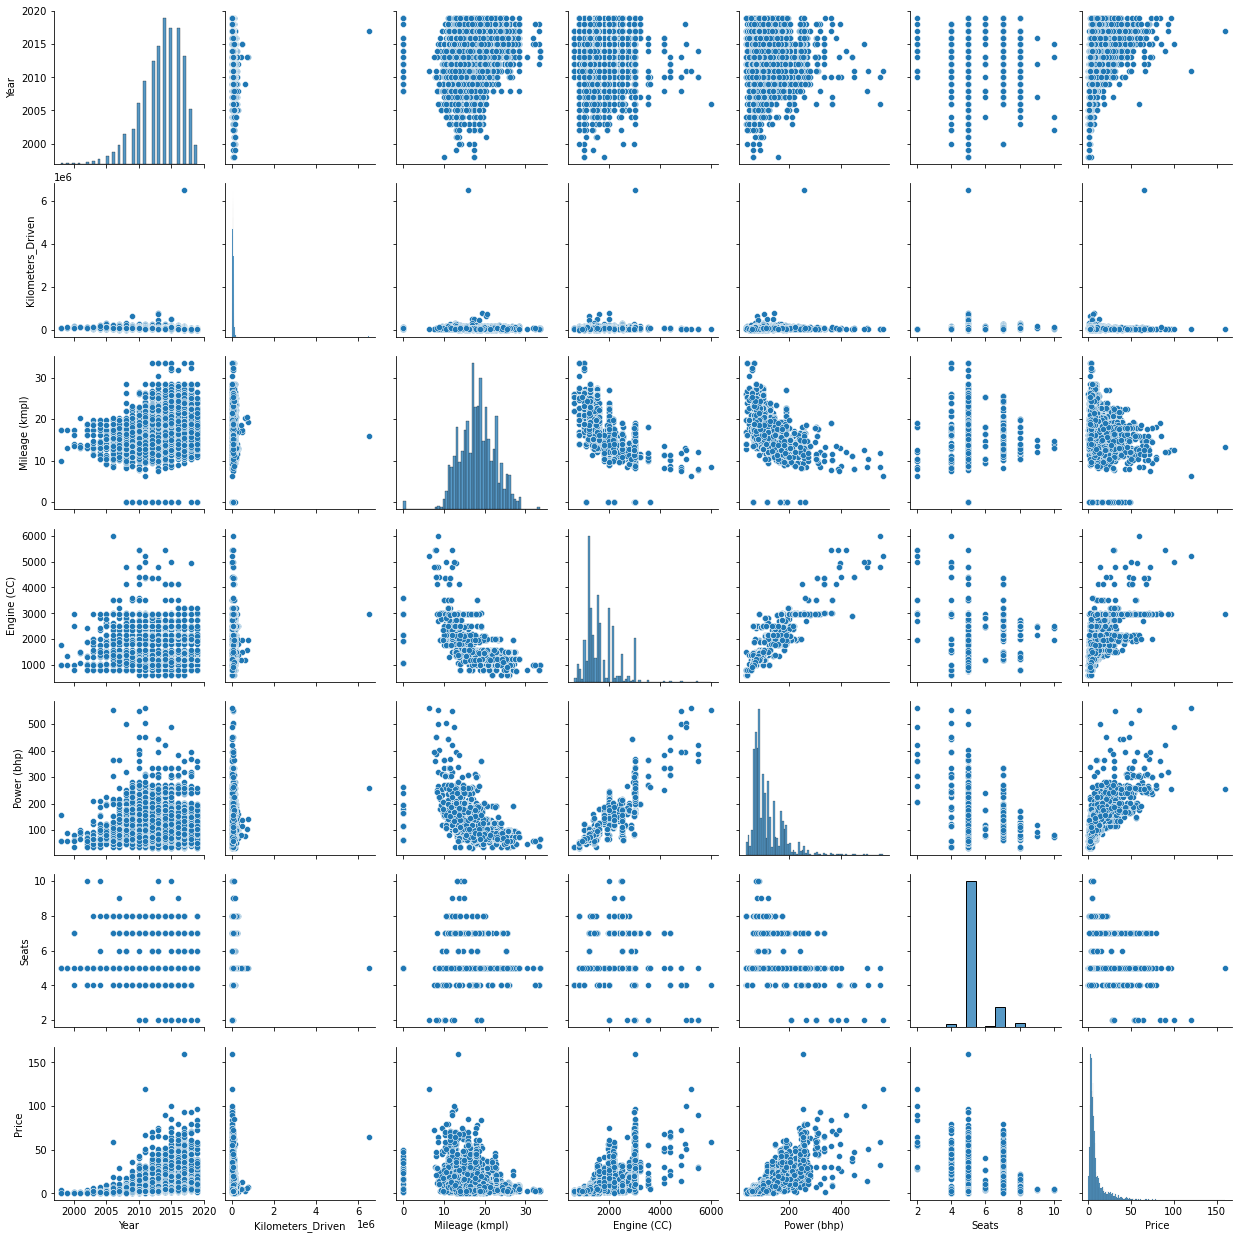

In [32]:
#Relationship between the numerical attributes
plt.figure(figsize=(20,25))
ax = sns.pairplot(data)
plt.show()

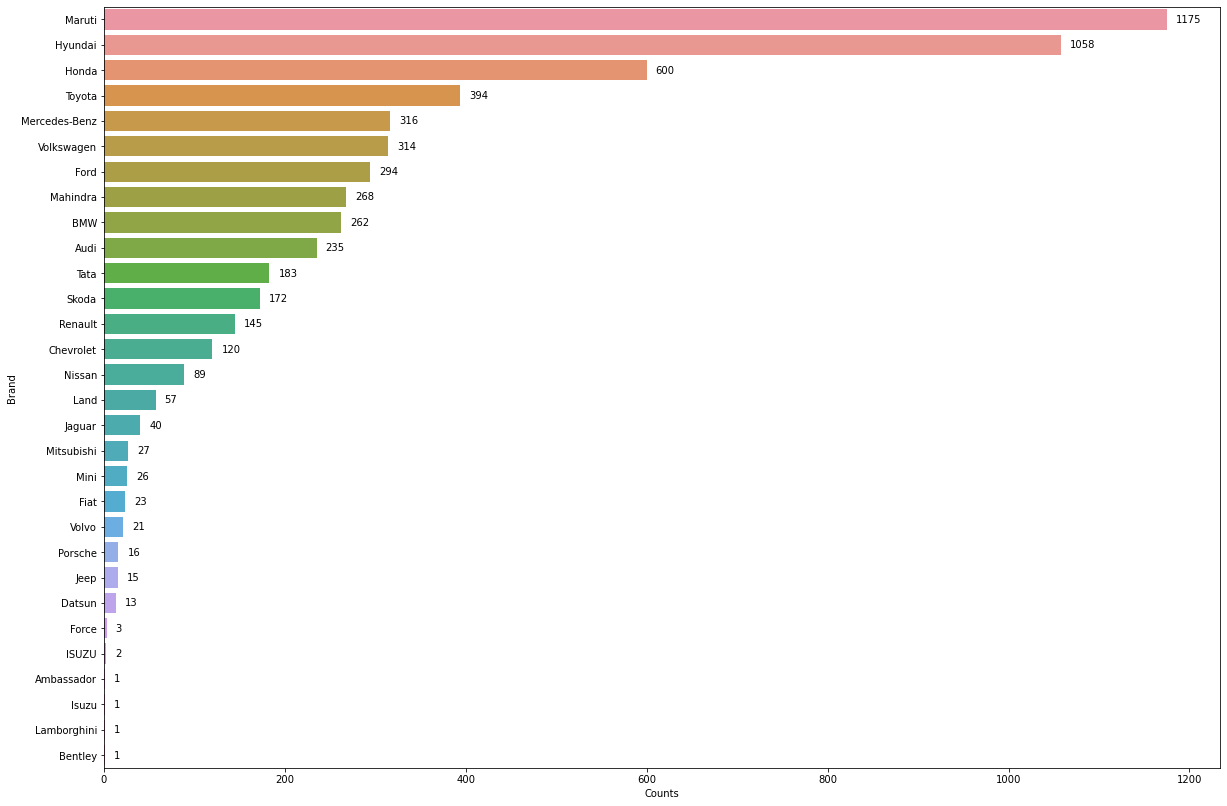

In [33]:
#Getting the count of the brands
df = data['Brand'].value_counts().rename_axis('Brand').reset_index(name='Counts')

#Plotting the car brands in dataset
plt.figure(figsize=(20,14))
ax = sns.barplot(data= df, x='Counts', y = 'Brand')
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    widght = p.get_width()
    # adding text to each bar
    ax.text(x = widght + 10, # x-coordinate position of data label, padded to be in the middle of the bar
            y = p.get_y() + (p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(widght), # data label, formatted to ignore decimals
            va = 'center') # sets horizontal alignment (ha) to center

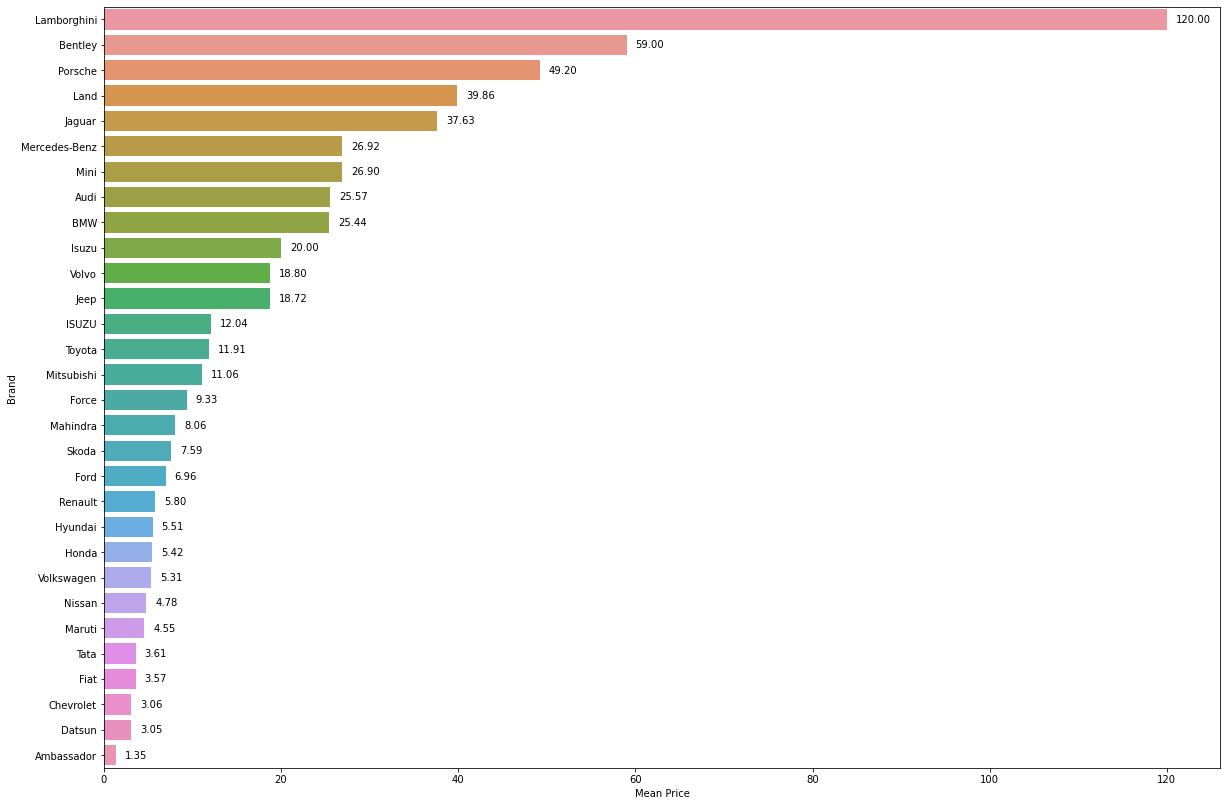

In [34]:
#Plotting the brands that its mean has the most expensive cars
df = data.groupby("Brand").mean().sort_values(by = 'Price', ascending = False)['Price'].rename_axis('Brand').reset_index(name='Mean Price')
plt.figure(figsize=(20,14))
ax = sns.barplot(data= df, x='Mean Price', y = 'Brand')
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    widght = p.get_width()
    # adding text to each bar
    ax.text(x = widght + 1, # x-coordinate position of data label, padded to be in the middle of the bar
            y = p.get_y() + (p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
            s = '{:.2f}'.format(widght), # data label, formatted to ignore decimals
            va = 'center') # sets horizontal alignment (ha) to center

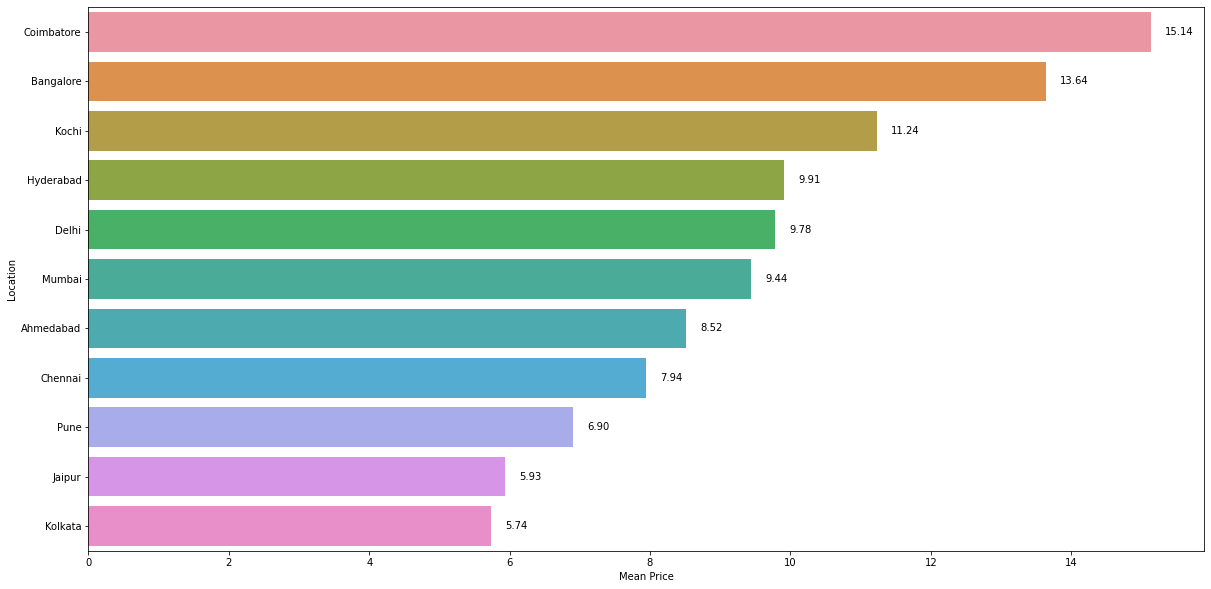

In [35]:
#Plotting the location that its mean has the most expensive cars
df = data.groupby("Location").mean().sort_values(by = 'Price', ascending = False)['Price'].rename_axis('Location').reset_index(name='Mean Price')
plt.figure(figsize=(20,10))
ax = sns.barplot(data= df, x='Mean Price', y = 'Location')
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    widght = p.get_width()
    # adding text to each bar
    ax.text(x = widght + 0.2, # x-coordinate position of data label, padded to be in the middle of the bar
            y = p.get_y() + (p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
            s = '{:.2f}'.format(widght), # data label, formatted to ignore decimals
            va = 'center') # sets horizontal alignment (ha) to center

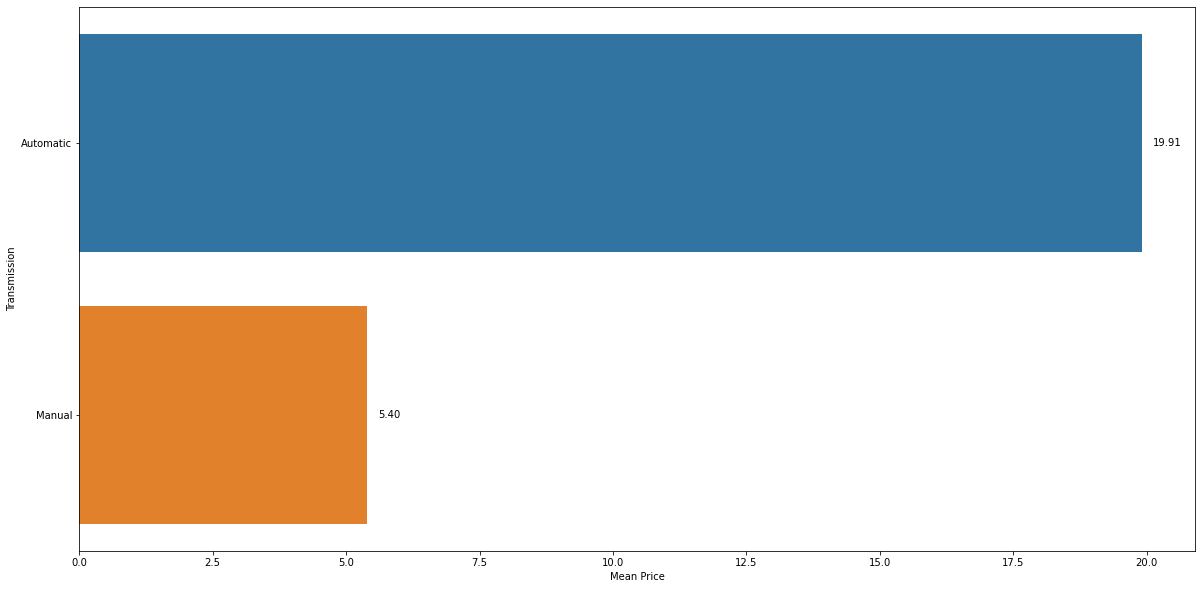

In [36]:
#Plotting the tramission that its mean has the most expensive cars
df = data.groupby("Transmission").mean().sort_values(by = 'Price', ascending = False)['Price'].rename_axis('Transmission').reset_index(name='Mean Price')
plt.figure(figsize=(20,10))
ax = sns.barplot(data= df, x='Mean Price', y = 'Transmission')
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    widght = p.get_width()
    # adding text to each bar
    ax.text(x = widght + 0.2, # x-coordinate position of data label, padded to be in the middle of the bar
            y = p.get_y() + (p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
            s = '{:.2f}'.format(widght), # data label, formatted to ignore decimals
            va = 'center') # sets horizontal alignment (ha) to center

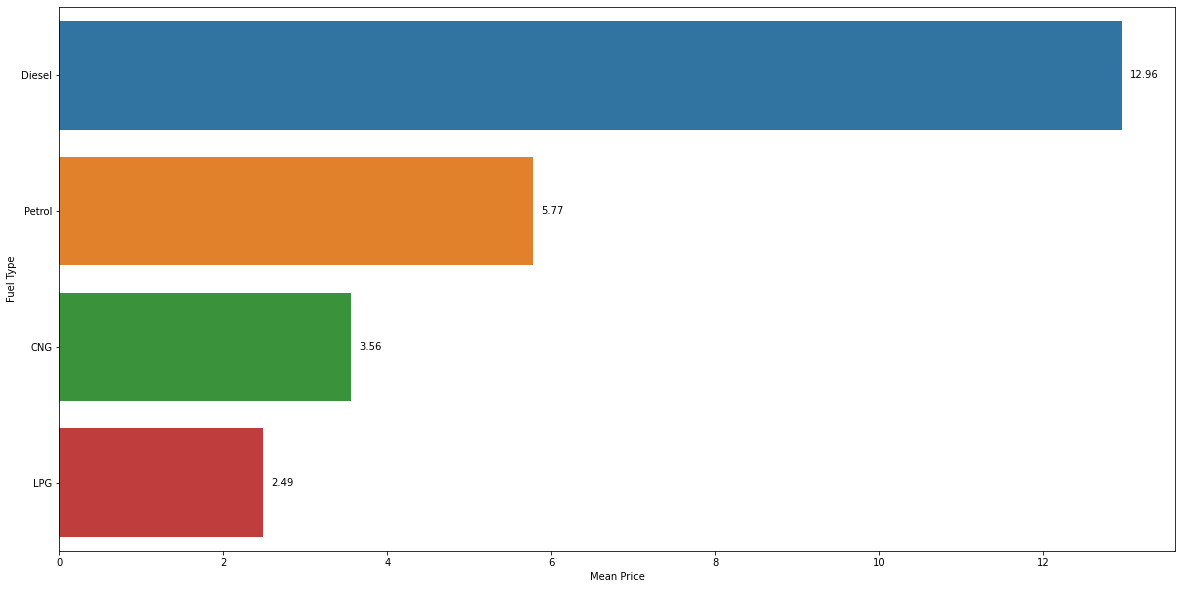

In [37]:
#Plotting the fuel type that its mean has the most expensive cars
df = data.groupby("Fuel_Type").mean().sort_values(by = 'Price', ascending = False)['Price'].rename_axis('Fuel Type').reset_index(name='Mean Price')
plt.figure(figsize=(20,10))
ax = sns.barplot(data= df, x='Mean Price', y = 'Fuel Type')
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    widght = p.get_width()
    # adding text to each bar
    ax.text(x = widght + 0.1, # x-coordinate position of data label, padded to be in the middle of the bar
            y = p.get_y() + (p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
            s = '{:.2f}'.format(widght), # data label, formatted to ignore decimals
            va = 'center') # sets horizontal alignment (ha) to center

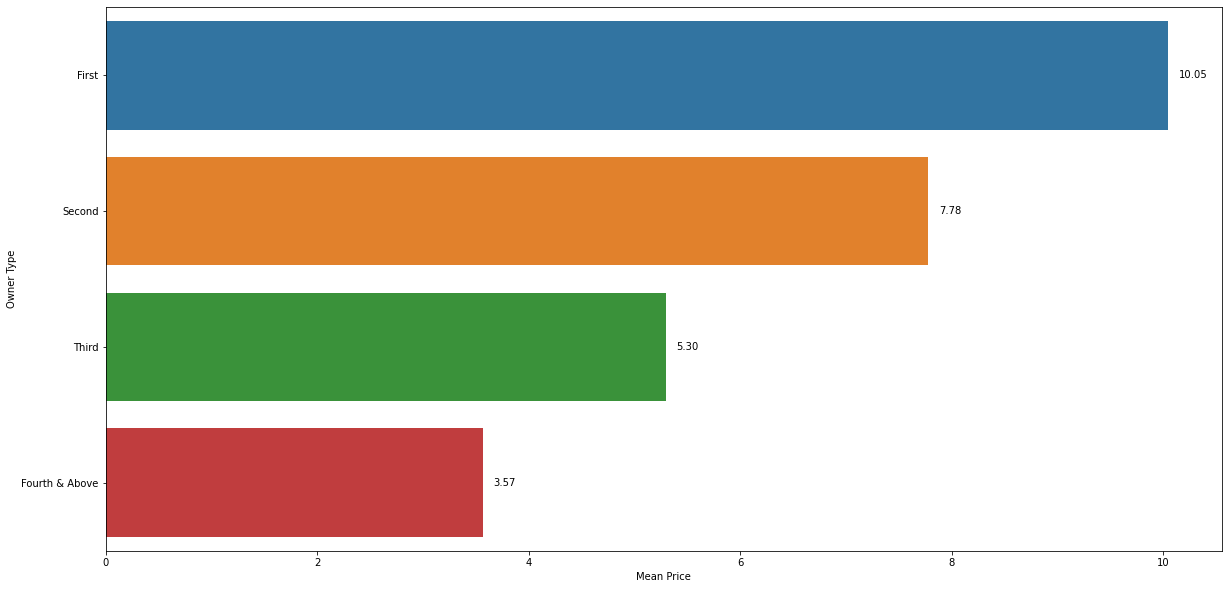

In [38]:
#Plotting the owner type that its mean has the most expensive cars
df = data.groupby("Owner_Type").mean().sort_values(by = 'Price', ascending = False)['Price'].rename_axis('Owner Type').reset_index(name='Mean Price')
plt.figure(figsize=(20,10))
ax = sns.barplot(data= df, x='Mean Price', y = 'Owner Type')
for p in ax.patches:
    # get the height of each bar
    height = p.get_height()
    widght = p.get_width()
    # adding text to each bar
    ax.text(x = widght + 0.1, # x-coordinate position of data label, padded to be in the middle of the bar
            y = p.get_y() + (p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
            s = '{:.2f}'.format(widght), # data label, formatted to ignore decimals
            va = 'center') # sets horizontal alignment (ha) to center

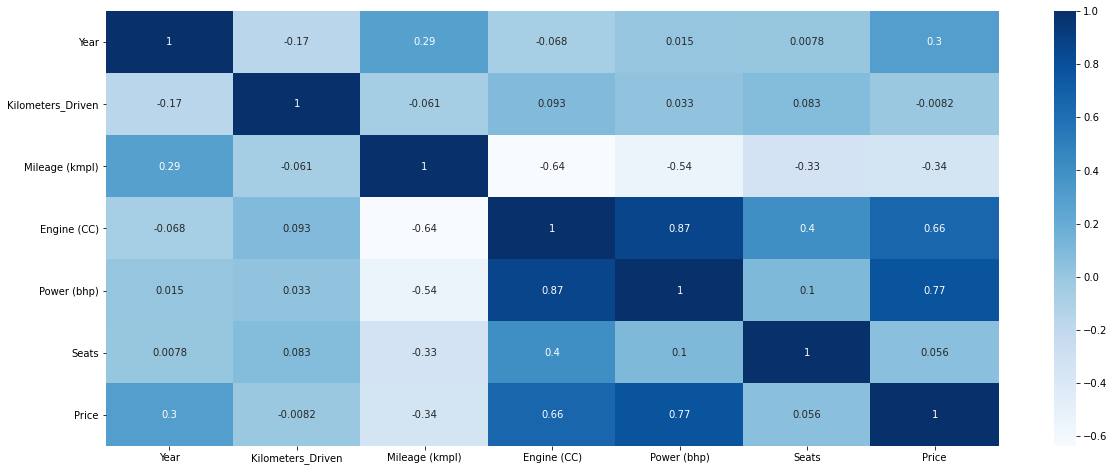

In [39]:
#Getting the correlation between the numerical variables
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot = True, cmap ="Blues")

From the data shown abova, it's possible to do some conclusion about the variables and influences the price:
- Year: Newers cars have high prices;
- Sets: The number os seats doesn't have much influence on the pri;ce
- Kilometers_Driven: This variavel doesn affect so much the price;
- Brand: Lamborghini, Bentley and Porsche have the most expensive cars;
- Location: Cambatore, Bangalore and Kochi have the most expesive cars;
- Transmission: Automatic cars are approximitely 3.71 times more expensive than manual cars;
- Fuel: Diesel cars are more expensive;
- Mileage: Cars with 6.14 kmpl are more expensive;
- Owner_Type: Cars that have only 1 owner are more expensive;
- Engine: As higher the engine, higher is the price;
- Power: As higher the power is, the higher is the price.

## 6. Feature Engineering

In this section the categorical features will be treated. Machine Learning models don't understand this type os varible, so they need to be transformed to numerical variable using some techniques to maintain their importance on the results of this project.

In [40]:
#Getting the unique value contained in each categorical column
for col in categorical_attributes:
    print(col,': ', data[col].unique())

Brand :  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley' 'Lamborghini']
Model :  ['Wagon R LXI CNG' 'Creta 1.6 CRDi SX Option' 'Jazz V' ...
 'Polo IPL II 1.2 Petrol Highline' 'Bolt Revotron XT' 'Xylo D4 BSIV']
Location :  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type :  ['CNG' 'Diesel' 'Petrol' 'LPG']
Transmission :  ['Manual' 'Automatic']
Owner_Type :  ['First' 'Second' 'Fourth & Above' 'Third']


In [41]:
#Encoding transmission
data['Transmission'] = data['Transmission'].map({'Manual':0, 'Automatic':1})

In [42]:
#Encoding Owner type
data['Owner_Type'] = data['Owner_Type'].map({'First': 1,'Second': 2,'Third': 3,'Fourth & Above': 4})

In [43]:
#Encoding more categorical variables
data = pd.get_dummies(data, columns=['Brand','Location','Fuel_Type'])

In [44]:
#Encoding the model
cat_enc = TargetEncoder()
data['Model'] = cat_enc.fit_transform(data['Model'], data['Price'])

In [45]:
data

,Model,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,3.087222,2010,72000,0,1,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,1,0,1,0,0,0
1,12.372454,2015,41000,0,1,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,1,0,1,0,0
2,6.051847,2011,46000,0,1,18.20,1199.0,88.70,5.0,4.50,...,0,0,0,0,0,0,0,0,0,1
3,6.914400,2012,87000,0,1,20.77,1248.0,88.76,7.0,6.00,...,0,0,0,0,0,0,0,1,0,0
4,12.534165,2013,40670,1,2,15.20,1968.0,140.80,5.0,17.74,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,4.833333,2014,27365,0,1,28.40,1248.0,74.00,5.0,4.75,...,0,0,0,0,0,0,0,1,0,0
5868,5.144067,2015,100000,0,1,24.40,1120.0,71.00,5.0,4.00,...,0,1,0,0,0,0,0,1,0,0
5869,9.603919,2012,55000,0,2,14.00,2498.0,112.00,8.0,2.90,...,0,1,0,0,0,0,0,1,0,0
5870,3.220870,2013,46000,0,1,18.90,998.0,67.10,5.0,2.65,...,0,0,0,1,0,0,0,0,0,1


All the categorical features were encoded. Below will be explained the reason of the chosen type of encoder to each variable

- Trasmission: As it has only two types of information, the binary encoder is enought to solve this problem.
- Owner_type: That is a numerical order between the categories. So the ordinal encoder was used to on it.
- Brand, Location and Fuel_type: Its categorical has no ordinal relationship between them. As it doesn't have a large number of categories, OneHotEncoder is a good option.
- Model: In this variable, there are a huge number of categories with no order relationship between them. So the TargetEncoder is a good option.

## 7.Presets

In this section it will setted some parameters that it will be used by the machine learning algorithms. Here it be declared your X variables and Y variables. It was also developed a function that splits the featuring to train and test variables to be used by the models and measure the algorithm performance by using some metrics.

In [46]:
#Declaring our X variables
x = data.drop(['Price'], axis =1)

#Declaring our y variables
y = data['Price']

In [47]:
#List to get the score of the models
results = []

In [48]:
#number of observation
n = data.shape[0]
n

5872

In [49]:
#number of indepent variables
p = data.shape[1]-1
p

54

In [50]:
#Adjusted R2
def ad_r2(R2):
    return (1-(1-R2)*(5872-1)/(5872-54-1))

In [51]:
def CrossVal(model,x,y,name):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =66)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cross_val = np.abs(np.mean(cross_val_score(model,x, y, cv = 10, scoring= 'r2')))
    results.append([name,ad_r2(cross_val)])

The chosen metric for this regression problem is R2 Adjusted. As the dataset has a considerable number of dependent variables, it's not possible to R2 because they don't penalize to addition of a large number os variables. The best metric to show reliable information on how well the prediction model is doing is the R2 Adjusted. 

## 8. Machine Learning Models

In this section will be defined all the algorithms that it will be used and it will be tested them all. It will also be analyzed the performance of each one using some metrics, so it will find the best model to this project.

In [52]:
model = LinearRegression()
CrossVal(model,x,y,'LinearRegression')

model = Lasso()
CrossVal(model,x,y,'Lasso')

model = Ridge()
CrossVal(model,x,y,'Ridge')

model = ElasticNet()
CrossVal(model,x,y,'ElasticNet')

model = DecisionTreeRegressor()
CrossVal(model,x,y,'DecisionTree')

model = RandomForestRegressor()
CrossVal(model,x,y,'RandomTree')

model = GradientBoostingRegressor()
CrossVal(model,x,y,'GradientBoost')

model = AdaBoostRegressor()
CrossVal(model,x,y,'AdaBoost')

model = XGBRegressor()
CrossVal(model,x,y,'XGBoost')

model = MLPRegressor(activation='logistic')
CrossVal(model,x,y,'NeuralNet')

model = SVR()
CrossVal(model,x,y,'SVR')

model = KNeighborsRegressor()
CrossVal(model,x,y,'KNN')

In [53]:
model_results = pd.DataFrame(results)
model_results.columns = ['Models','R2 Adjusted']
model_results.sort_values(by = 'R2 Adjusted', ascending = False)

,Models,R2 Adjusted
8,XGBoost,0.907576
6,GradientBoost,0.902649
5,RandomTree,0.898816
4,DecisionTree,0.806634
0,LinearRegression,0.799505
2,Ridge,0.798519
3,ElasticNet,0.763121
1,Lasso,0.759717
11,KNN,0.564614
7,AdaBoost,0.527204


The machine learning algorithm that had the best performance according to the chosen metrics, R2 Adjusted, is XGBoost. With a value of 0.908, this means that 90.8% of the variation in the dependent variable are explained by the indenpendent variables. So it's possible to conclude that the model has a good prediction.

## 9. Conclusions

Along this project, it was possible to understand the impact of each variable on the price of car. In the sequence, it will remembered the most important variables of this project:
- As newer the car is, higher it will be the price
- Brands like Lamborghini, Bentley and Porsche have more expensive cars
- Diesel cars are more expensive
- Automatic car is approximately 3.7 time more expesive than manual cars
- Cars with a higher number of owner are cheaper.
- Powerful cars are more expensive.
- Large engine cars are more expensive too.

According to this project, people can understand what factors influences the price of a car and also help them to analyse what car they can buy according to their budget. This project can be also used to predict if the price offered by a shoper is an honest price, so the buyer won't get cheated.